<a href="https://colab.research.google.com/github/saranyapalani/PROJECT_IV_2020/blob/master/ANALYSIS%20AND%20FORECASTING%20OF%20JEWEL%20THEFT%20MURDER%20CRIME%20RATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PREDICTING JEWELS THEFT AND MURDER CRIME RATE USING FACEBOOK PROPHET


In [0]:
#importing datasets from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the packages

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import folium
import math
from folium.plugins import HeatMap
import folium
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load the datasets


In [0]:
df_1 = pd.read_csv('/content/drive/My Drive/d1.csv', error_bad_lines=False)
df_2 = pd.read_csv('/content/drive/My Drive/d2.csv', error_bad_lines=False)
df_3 = pd.read_csv('/content/drive/My Drive/d3.csv', error_bad_lines=False)
df_4 = pd.read_csv('/content/drive/My Drive/d4.csv', error_bad_lines=False)
df_5 = pd.read_csv('/content/drive/My Drive/d5.csv', error_bad_lines=False)
df_6 = pd.read_csv('/content/drive/My Drive/d6.csv', error_bad_lines=False)

In [0]:
#Concat all the dataset into one

In [6]:
df = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], ignore_index=False, axis=0)
df.head()


,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,11149297,JA506752,01-01-2014 00:01,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,25.0,26.0,23.0,NaN,NaN,2014,NaN,NaN,NaN
1,10394673,HX561124,07-05-2014 00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,25.0,31.0,22.0,NaN,NaN,2014,NaN,NaN,NaN
2,12032628,JD211529,09-01-2014 14:25,DECEPTIVE PRACTICE,RESIDENCE,False,7.0,16.0,67.0,NaN,NaN,2014,NaN,NaN,NaN
3,11895409,JC515153,11/14/2014 08:00:00 AM,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,16.0,31.0,15.0,NaN,NaN,2014,NaN,NaN,NaN
4,9863337,HX513133,11/19/2014 09:20:00 PM,BATTERY,ALLEY,False,24.0,50.0,2.0,1156959.0,1945011.0,2014,42.004885,-87.697889,"(42.004884982, -87.697889126)"


In [0]:
#Assembling a datetime by rearranging the dataframe column "Date"

In [7]:
df['Date'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y %H:%M:%S')
df.head()


,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,11149297,JA506752,2014-01-01 00:01:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,25.0,26.0,23.0,NaN,NaN,2014,NaN,NaN,NaN
1,10394673,HX561124,2014-07-05 00:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,25.0,31.0,22.0,NaN,NaN,2014,NaN,NaN,NaN
2,12032628,JD211529,2014-09-01 14:25:00,DECEPTIVE PRACTICE,RESIDENCE,False,7.0,16.0,67.0,NaN,NaN,2014,NaN,NaN,NaN
3,11895409,JC515153,2014-11-14 08:00:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,16.0,31.0,15.0,NaN,NaN,2014,NaN,NaN,NaN
4,9863337,HX513133,2014-11-19 21:20:00,BATTERY,ALLEY,False,24.0,50.0,2.0,1156959.0,1945011.0,2014,42.004885,-87.697889,"(42.004884982, -87.697889126)"


In [0]:
#setting the index to be the date

In [8]:
df.index = pd.DatetimeIndex(df.Date)
df.head()


,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,
2014-01-01 00:01:00,11149297,JA506752,2014-01-01 00:01:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,25.0,26.0,23.0,NaN,NaN,2014,NaN,NaN,NaN
2014-07-05 00:00:00,10394673,HX561124,2014-07-05 00:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,25.0,31.0,22.0,NaN,NaN,2014,NaN,NaN,NaN
2014-09-01 14:25:00,12032628,JD211529,2014-09-01 14:25:00,DECEPTIVE PRACTICE,RESIDENCE,False,7.0,16.0,67.0,NaN,NaN,2014,NaN,NaN,NaN
2014-11-14 08:00:00,11895409,JC515153,2014-11-14 08:00:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,16.0,31.0,15.0,NaN,NaN,2014,NaN,NaN,NaN
2014-11-19 21:20:00,9863337,HX513133,2014-11-19 21:20:00,BATTERY,ALLEY,False,24.0,50.0,2.0,1156959.0,1945011.0,2014,42.004885,-87.697889,"(42.004884982, -87.697889126)"


In [0]:
#Crime type and their counts


In [9]:
df['Primary Type'].value_counts()

JEWEL THEFT MURDER                   372506
BATTERY                              297180
CRIMINAL DAMAGE                      171022
ASSAULT                              113000
DECEPTIVE PRACTICE                   108170
NARCOTICS                            105747
OTHER OFFENSE                        103010
BURGLARY                              76406
MOTOR VEHICLE THEFT                   61618
ROBBERY                               60943
CRIMINAL TRESPASS                     40785
WEAPONS VIOLATION                     26395
OFFENSE INVOLVING CHILDREN            13977
PUBLIC PEACE VIOLATION                11321
CRIM SEXUAL ASSAULT                    8969
INTERFERENCE WITH PUBLIC OFFICER       7582
SEX OFFENSE                            6465
PROSTITUTION                           5881
HOMICIDE                               3492
ARSON                                  2561
LIQUOR LAW VIOLATION                   1605
GAMBLING                               1426
KIDNAPPING                      

In [0]:
#taking top 15 crime types and their counts

In [10]:
df['Primary Type'].value_counts().iloc[:15]

JEWEL THEFT MURDER            372506
BATTERY                       297180
CRIMINAL DAMAGE               171022
ASSAULT                       113000
DECEPTIVE PRACTICE            108170
NARCOTICS                     105747
OTHER OFFENSE                 103010
BURGLARY                       76406
MOTOR VEHICLE THEFT            61618
ROBBERY                        60943
CRIMINAL TRESPASS              40785
WEAPONS VIOLATION              26395
OFFENSE INVOLVING CHILDREN     13977
PUBLIC PEACE VIOLATION         11321
CRIM SEXUAL ASSAULT             8969
Name: Primary Type, dtype: int64

In [0]:
#indexing the top 15 crimes


In [11]:
df['Primary Type'].value_counts().iloc[:15].index

Index(['JEWEL THEFT MURDER', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'NARCOTICS', 'OTHER OFFENSE', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT'],
      dtype='object')

In [0]:
#plotting the crime types

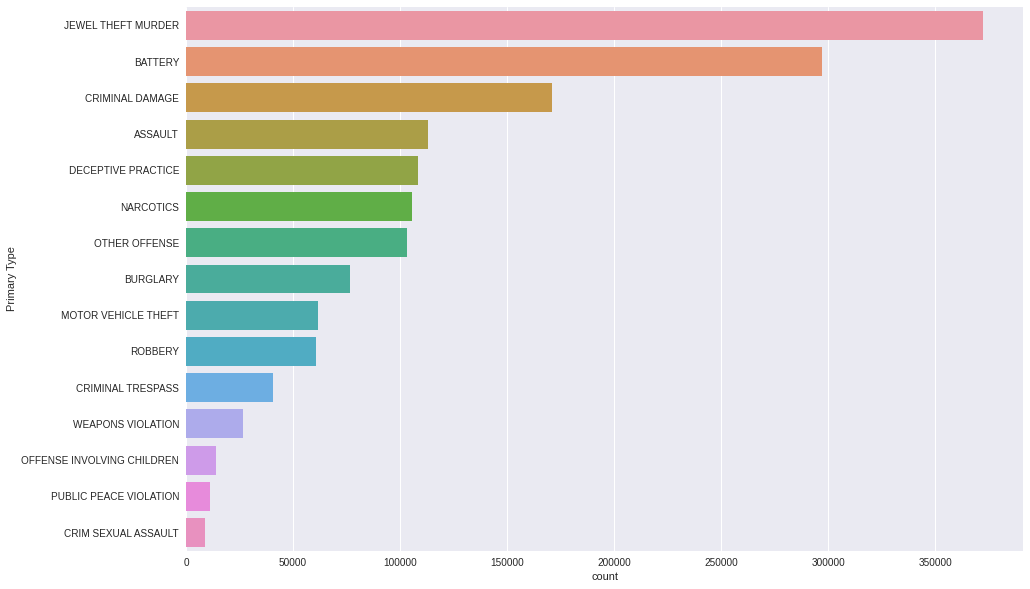

In [15]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data= df, 
              order = df['Primary Type'].value_counts().iloc[:15].index)


In [0]:
#dropping unwanted columns

In [0]:
df.drop(['ID','Case Number','X Coordinate', 'Y Coordinate','Ward','Community Area', 'Location', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [0]:
#From above graph,we can see that jewels theft and murder has the highest value compared to other crimes.
#So we are grouping only jewels theft and murder crime from rest of the crime types and making a forecast for next two years!

In [0]:
Groups = df.groupby(df['Primary Type'])
Groups = dict(list(Groups))
data = [Groups['JEWEL THEFT MURDER']]
data = pd.concat(data, axis = 0)
del Groups
del df

In [0]:
#Finding month,day of week,day of month,day of year,week of month and week of year

In [0]:
data['Month'] = data.index.month
data['dayOfWeek'] = data.index.dayofweek
data['dayOfMonth'] = data.index.day
data['dayOfYear'] = data.index.dayofyear
data['weekOfMonth'] = data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
data['weekOfYear'] = weekOfYear


In [0]:
#plotting crime by day of week

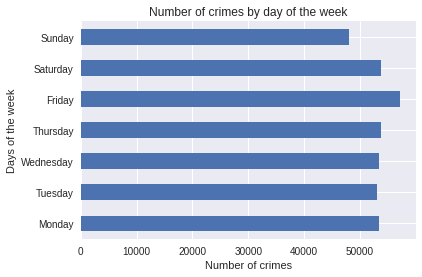

In [20]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()


In [0]:
#day of week count

In [21]:
data.dayOfWeek.value_counts(normalize=True)


4    0.153329
3    0.144516
5    0.144269
2    0.143415
0    0.143292
1    0.142419
6    0.128760
Name: dayOfWeek, dtype: float64

In [0]:
#plotting crime by month of year

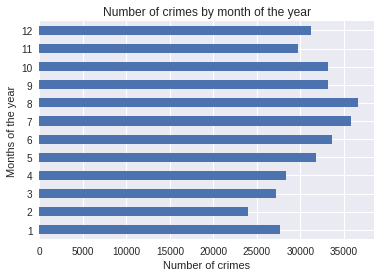

In [22]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


In [0]:
#plotting month of year value

In [23]:
data.Month.value_counts(normalize=True)

8     0.098431
7     0.096109
6     0.090441
10    0.089174
9     0.088981
5     0.085360
12    0.083805
11    0.079905
4     0.076251
1     0.074359
3     0.072952
2     0.064233
Name: Month, dtype: float64

In [0]:
#plotting number of crime per month

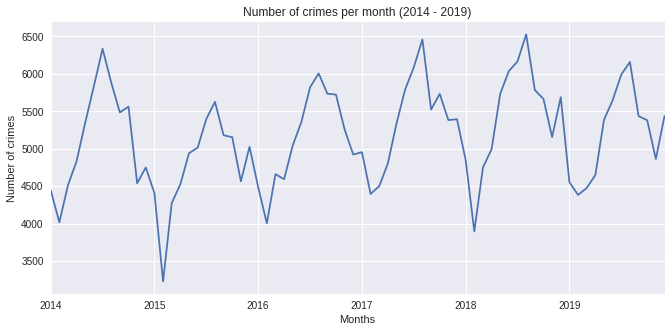

In [24]:
plt.figure(figsize=(11,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2014 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


In [0]:
#plotting day of month

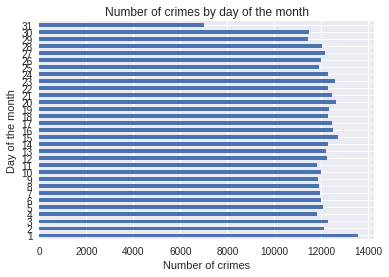

In [25]:
data.groupby([data.dayOfMonth]).size().plot(kind='barh')
plt.ylabel('Day of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the month')
plt.show()


In [0]:
#day of month value

In [26]:
data.dayOfMonth.value_counts(normalize=True)

1     0.036437
15    0.034158
20    0.033863
23    0.033812
16    0.033562
17    0.033476
21    0.033471
19    0.033041
24    0.033001
22    0.032987
3     0.032955
18    0.032923
14    0.032920
12    0.032813
13    0.032770
27    0.032577
2     0.032480
5     0.032381
28    0.032292
26    0.032206
6     0.032185
10    0.032179
7     0.032013
8     0.031981
25    0.031911
9     0.031830
11    0.031766
4     0.031702
30    0.030797
29    0.030681
31    0.018832
Name: dayOfMonth, dtype: float64

In [0]:
#plotting number of crime per day

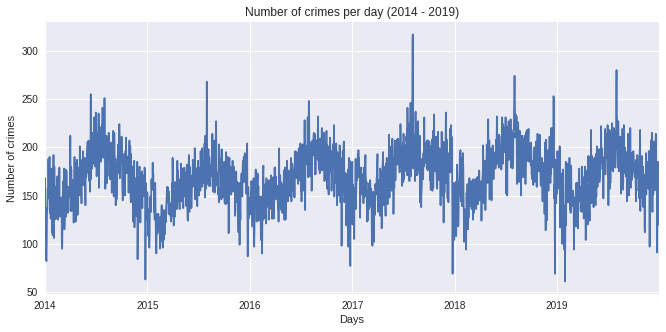

In [27]:
plt.figure(figsize=(11,5))
data.resample('D').size().plot(legend=False)
plt.title('Number of crimes per day (2014 - 2019)')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()


In [0]:
#plotting week of month

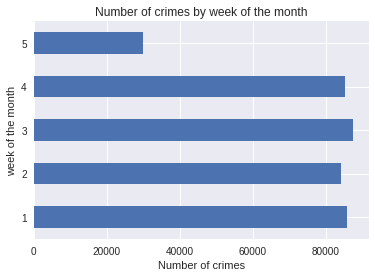

In [28]:
data.groupby([data.weekOfMonth]).size().plot(kind='barh')
plt.ylabel('week of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by week of the month')
plt.show()


In [0]:
#week of month

In [29]:
data.weekOfMonth.value_counts(normalize=True)

3    0.234493
1    0.230152
4    0.228786
2    0.226259
5    0.080310
Name: weekOfMonth, dtype: float64

In [0]:
#plotting week of year

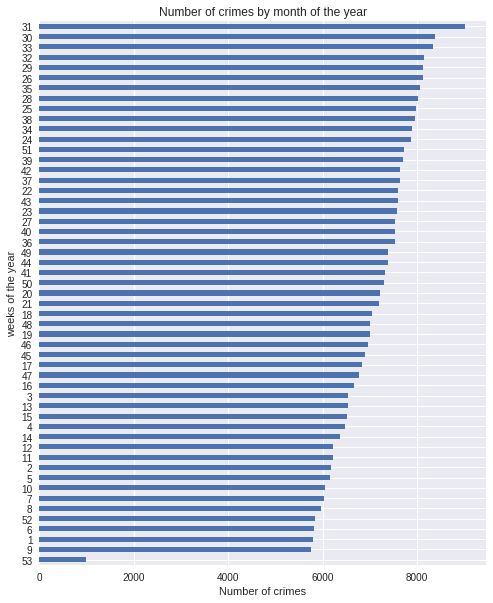

In [30]:
plt.figure(figsize=(8,10))
data.groupby([data.weekOfYear]).size().sort_values().plot(kind='barh')
plt.ylabel('weeks of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()


In [0]:
#plotting number of crime per week

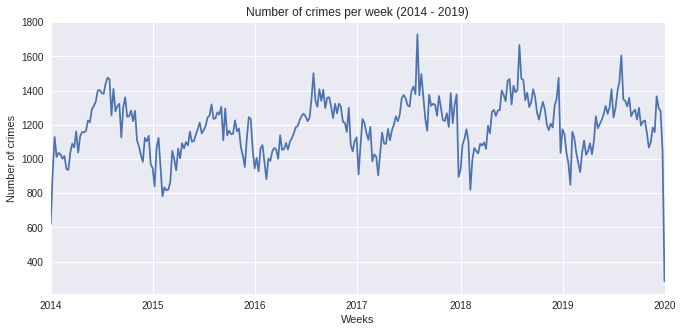

In [31]:
plt.figure(figsize=(11,5))
data.resample('W').size().plot(legend=False)
plt.title('Number of crimes per week (2014 - 2019)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()


In [0]:
#plotting number of crimes by year

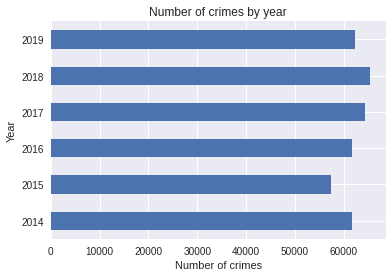

In [33]:
data.groupby([data.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()


In [0]:
# year count

In [34]:
data.Year.value_counts(normalize=True)

2018    0.175173
2017    0.172797
2019    0.167415
2016    0.165407
2014    0.165273
2015    0.153936
Name: Year, dtype: float64

In [0]:
#plotting location description

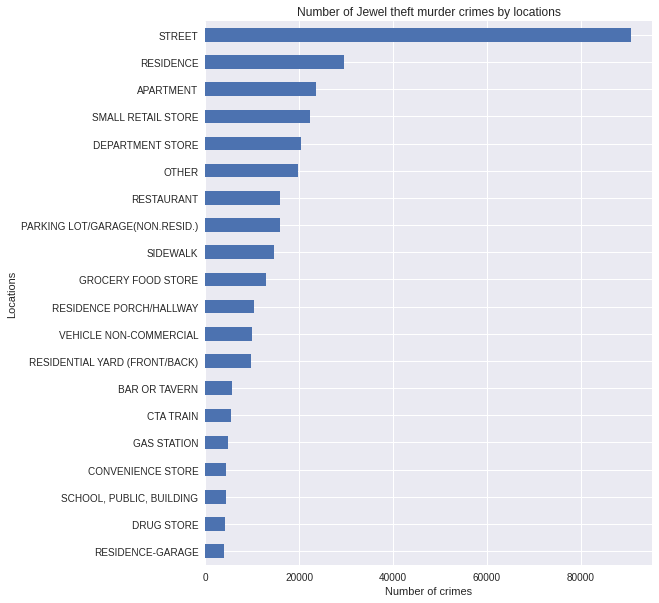

In [36]:
plt.figure(figsize=(8,10))
data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-20:].plot(kind='barh')
plt.title('Number of Jewel theft murder crimes by locations')
plt.ylabel('Locations')
plt.xlabel('Number of crimes')
plt.show()


In [0]:
#location values

In [37]:
data['Location Description'].value_counts().iloc[:20]

STREET                            90674
RESIDENCE                         29582
APARTMENT                         23516
SMALL RETAIL STORE                22350
DEPARTMENT STORE                  20482
OTHER                             19685
RESTAURANT                        15887
PARKING LOT/GARAGE(NON.RESID.)    15806
SIDEWALK                          14580
GROCERY FOOD STORE                12998
RESIDENCE PORCH/HALLWAY           10324
VEHICLE NON-COMMERCIAL             9966
RESIDENTIAL YARD (FRONT/BACK)      9617
BAR OR TAVERN                      5612
CTA TRAIN                          5372
GAS STATION                        4784
CONVENIENCE STORE                  4425
SCHOOL, PUBLIC, BUILDING           4402
DRUG STORE                         4231
RESIDENCE-GARAGE                   3885
Name: Location Description, dtype: int64

In [0]:
#plotting number of crime by districts

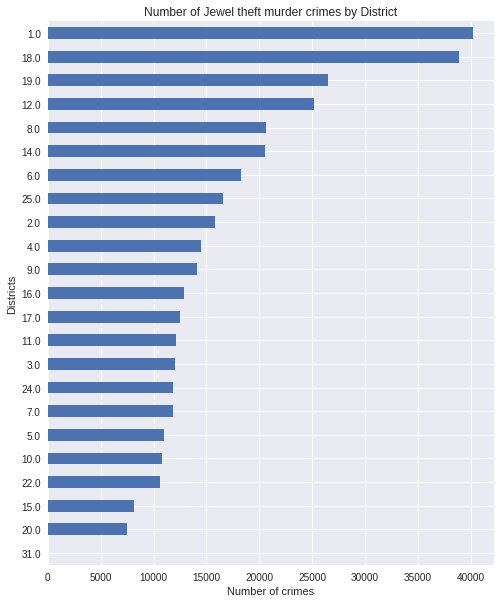

In [38]:
plt.figure(figsize=(8,10))
data.groupby([data['District']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Jewel theft murder crimes by District')
plt.ylabel('Districts')
plt.xlabel('Number of crimes')
plt.show()


In [0]:
#arrest count

In [39]:
data.Arrest.value_counts()

False    332895
True      39611
Name: Arrest, dtype: int64

In [0]:
#converting into int types

In [40]:
data.Arrest = data.Arrest.astype(int)
data.Arrest.value_counts()

0    332895
1     39611
Name: Arrest, dtype: int64

In [0]:
#plotting arrest rate

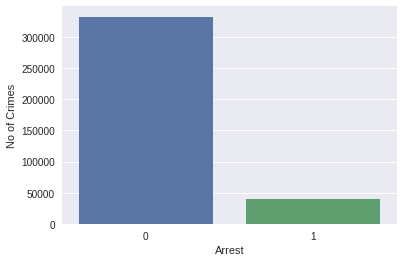

In [41]:
sns.countplot(x='Arrest',data=data)
plt.ylabel('No of Crimes')
plt.show()


In [0]:
#plotting arrest rate per districts

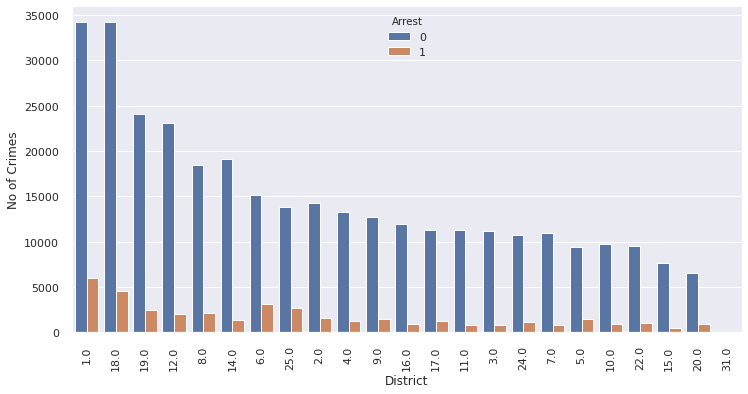

In [42]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='District',hue='Arrest',data=data,order=data['District'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()


In [0]:
#FORECASTING

In [0]:
#grouping the data into monthly records
#the datasets contain date and crime count per month columns


In [44]:
theft_prophet = data.resample('M').size().reset_index()
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()


,Date,Crime Count
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352


In [0]:
#dataframe

In [47]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [0]:
#renaming the date column as ds and crime count column as y for timeseries forecasting


In [48]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
theft_prophet_data.head()


,ds,y
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352


In [0]:
#Time Series Forecasting

In [0]:
#Model Initialize

In [0]:
from fbprophet import Prophet
m = Prophet()


In [0]:
#adding weekly predictions

In [50]:
m.add_seasonality(name="weekly",period=7,fourier_order=5)


In [0]:
#dataset shape

In [51]:
theft_prophet_data.shape

(72, 2)

In [0]:
#Splitting the datasets into train and test

In [0]:
train = theft_prophet_data[:62]
test = theft_prophet_data[62:]


In [0]:
#train dataset

In [53]:
train

,ds,y
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352
...,...,...
57,2018-10-31,5665
58,2018-11-30,5156
59,2018-12-31,5688
60,2019-01-31,4554


In [0]:
#fit model

In [54]:
m.fit(train)

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#future dates for next two years


In [55]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
...,...
787,2021-02-23
788,2021-02-24
789,2021-02-25
790,2021-02-26


In [0]:
#forecasting the future


In [0]:
forecast = m.predict(future)


In [0]:
#The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.


In [57]:
forecast[['ds','trend','yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,trend,yhat,yhat_lower,yhat_upper
787,2021-02-23,5895.572231,2653.955280,2367.116126,2917.581045
788,2021-02-24,5895.968250,2884.607356,2615.657732,3156.054354
789,2021-02-25,5896.364270,3462.711465,3186.361454,3737.461329
790,2021-02-26,5896.760290,3810.758715,3530.360965,4073.481123
791,2021-02-27,5897.156310,4193.234146,3911.119660,4442.123623


In [0]:
#plotting the forecast
#dotted lines represent the actual values and blue color represents predicted values


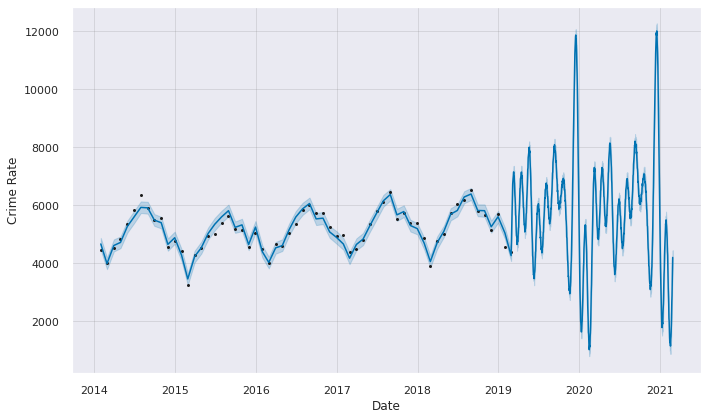

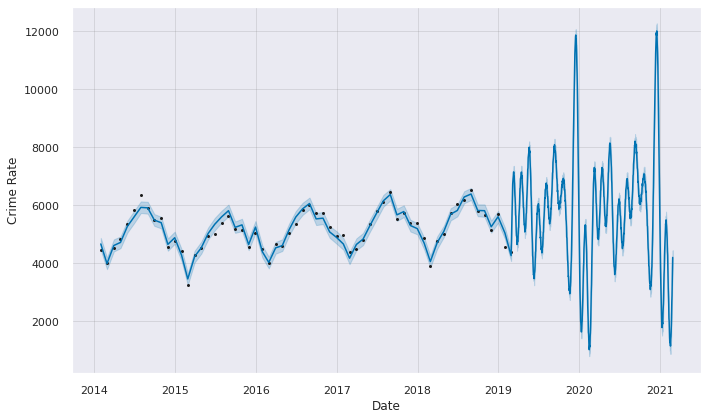

In [58]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

In [0]:
#plotting forecast year wise,week wise and month wise

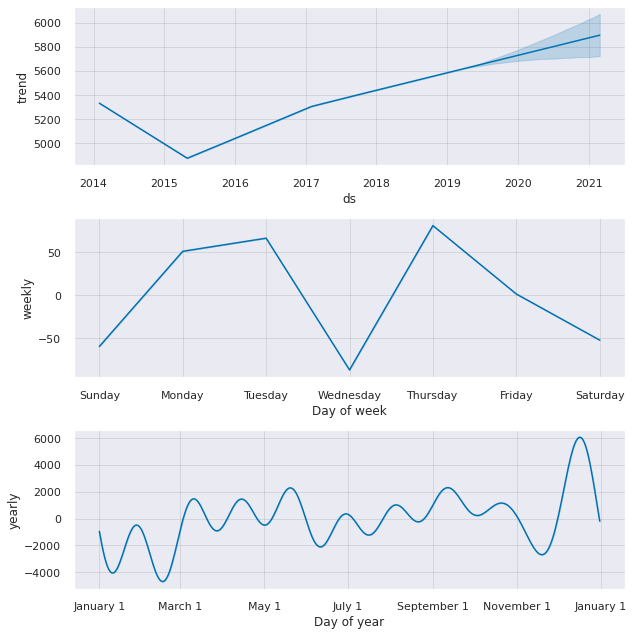

In [59]:
fig=m.plot_components(forecast)

In [0]:
#test datasets

In [60]:
test

,ds,y
62,2019-03-31,4475
63,2019-04-30,4649
64,2019-05-31,5386
65,2019-06-30,5647
66,2019-07-31,5991
67,2019-08-31,6159
68,2019-09-30,5436
69,2019-10-31,5381
70,2019-11-30,4864
71,2019-12-31,5437


In [0]:
#plotting the testing data

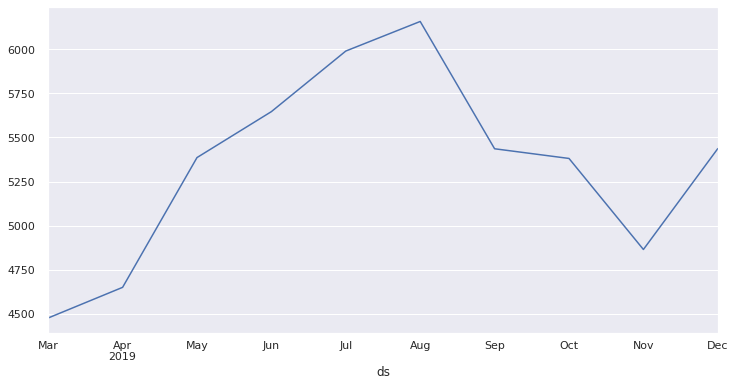

In [61]:
test = test.set_index("ds")
test = test['y']
import matplotlib.pyplot as plt
test.plot()


In [0]:
#Trend changepoints
#Find Point/Dates For Change


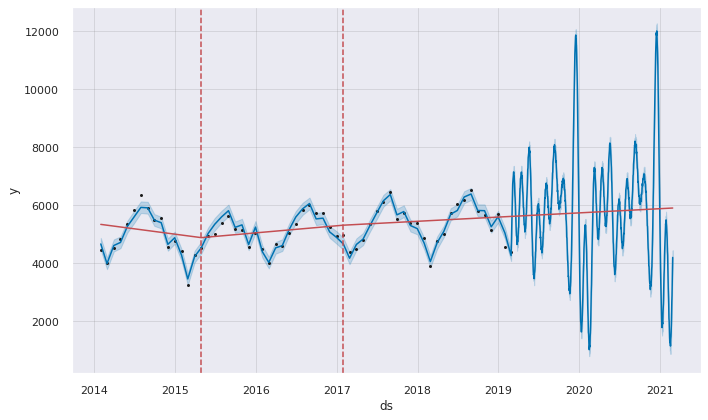

In [62]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)


In [0]:
#The above graph represents the prediction for Jewels theft and murder crime for the year 2014 to 2019 and made a future prediction for the years 2020 and 2021.
#The black dotted lines represent the actual values and blue lines represent the predicted values.
#The red line represents the trend changepoint at which the rate is allowed to change.
#From the above forecast,we can see that crime rate is expected to rise in the mid of 2020 and 2021 and there will be times where crime rate will be low as well.
#We can see that our predicted values quite matches with actual values,hence our model will prove efficient for foreseeing the future.

In [0]:
#MODEL EVALUATION

In [0]:
#load packages

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [0]:
#actual and predicted values

In [65]:
metric_df = forecast.set_index('ds')[['yhat']].join(theft_prophet_data.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
metric_df.head()

,ds,yhat,y
0,2014-01-31,4657.231101,4448.0
1,2014-02-28,3981.532823,4017.0
2,2014-03-31,4605.684869,4515.0
3,2014-04-30,4711.081194,4836.0
4,2014-05-31,5263.605939,5352.0


In [0]:
#r squared value

In [66]:
r2_score(metric_df.y, metric_df.yhat)

0.8762111564678831

In [0]:
#mean squared error

In [67]:
mean_squared_error(metric_df.y, metric_df.yhat)

54211.978298797614

In [0]:
#mean absolute error

In [68]:
mean_absolute_error(metric_df.y, metric_df.yhat)

173.78030271815203

In [0]:
#from the above evaluation,we can see that we got an r-squared value of 87% which is actually amazing and it tells that our model is good.
#mean squared error value and mean absolute error are not too large which shows that our model is a good fit.

In [0]:
#Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [0]:
#This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.


In [70]:
from fbprophet.diagnostics import cross_validation
forecast = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
forecast.head()


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-03-10 00:00:00 and 2018-02-28 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-03-31,-184.391478,-206.957103,-162.206414,4661,2016-03-10
1,2016-04-30,8727.120455,8650.415567,8802.349117,4594,2016-03-10
2,2016-05-31,4057.556727,3903.469459,4210.256454,5046,2016-03-10
3,2016-06-30,1559.866899,1321.963382,1789.911255,5359,2016-03-10
4,2016-07-31,4834.724830,4478.191751,5155.653467,5820,2016-03-10


In [0]:
#The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

In [0]:
#Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days. On this 8 year time series, this corresponds to 11 total forecasts.

In [71]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(forecast)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,7.007761e+06,2647.217590,1851.732896,0.390926,0.144256,0.0
1,55 days,3.120698e+06,1766.549803,1109.877871,0.229147,0.091668,0.0
2,56 days,2.980418e+06,1726.388586,1012.918168,0.214685,0.080850,0.0
3,60 days,2.975610e+06,1724.995624,1007.990327,0.209822,0.077079,0.0
4,61 days,2.954180e+06,1718.772952,969.950544,0.203471,0.075700,0.0


In [0]:
#The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

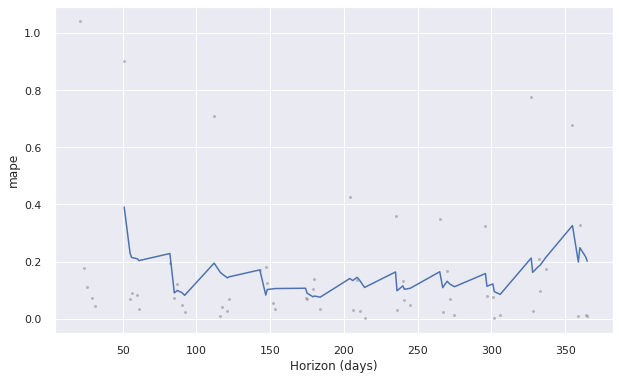

In [73]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(forecast, metric='mape')


In [0]:
#Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in forecast. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.